In [531]:
import numpy                    as np
import pandas                   as pd
import matplotlib.pyplot        as plt 
import seaborn                  as sns
import plotly.express           as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import scipy.stats              as stats
import missingno                as msno
from   sklearn.linear_model     import LinearRegression
from   sklearn.tree             import DecisionTreeRegressor
from   sklearn.ensemble         import RandomForestRegressor
from   sklearn.svm              import SVR
from   sklearn.model_selection  import train_test_split
from   sklearn.preprocessing    import OneHotEncoder
from   sklearn.metrics          import mean_squared_error,mean_absolute_error,r2_score
from   sklearn.impute           import SimpleImputer
from   sklearn.preprocessing    import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [532]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [533]:
ID = test.Id # for final submission

In [534]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [535]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [536]:
train.isnull().sum()[train.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [537]:
test.isnull().sum()[test.isnull().sum()>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [538]:
train.isnull().sum()[train.isnull().sum()>1000]

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [539]:
test.isnull().sum()[test.isnull().sum()>1000]

Alley          1352
PoolQC         1456
Fence          1169
MiscFeature    1408
dtype: int64

<AxesSubplot:>

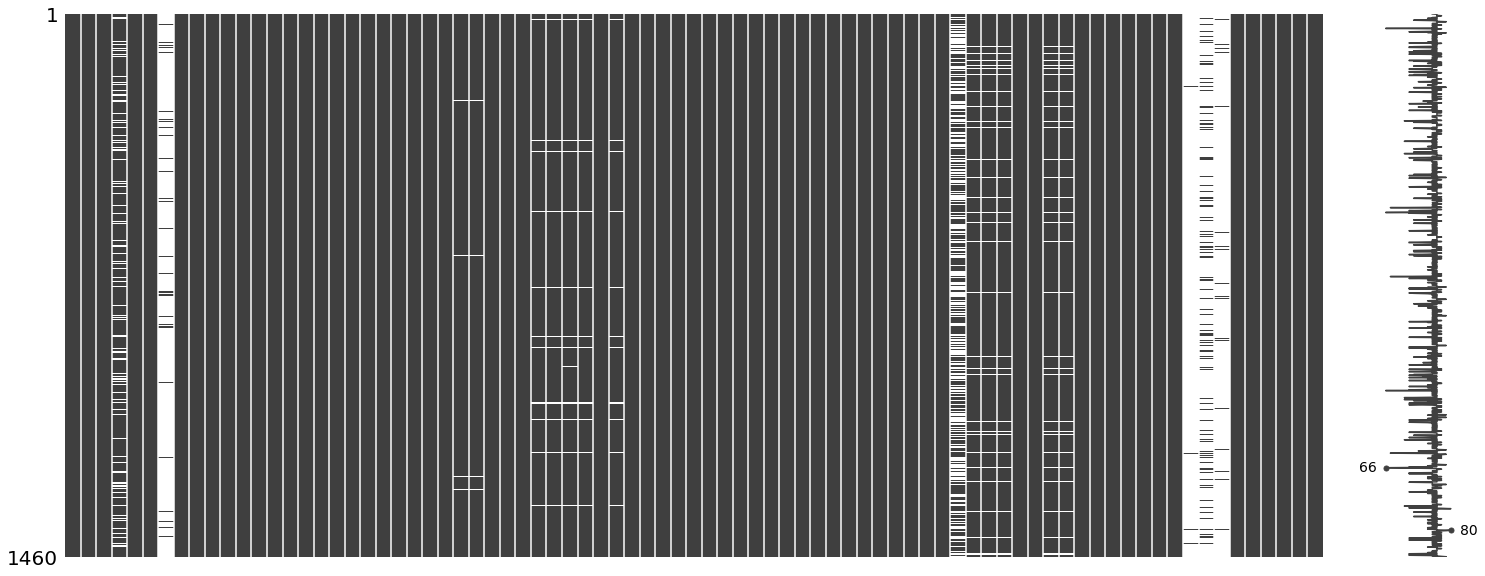

In [540]:
msno.matrix(train)

<AxesSubplot:>

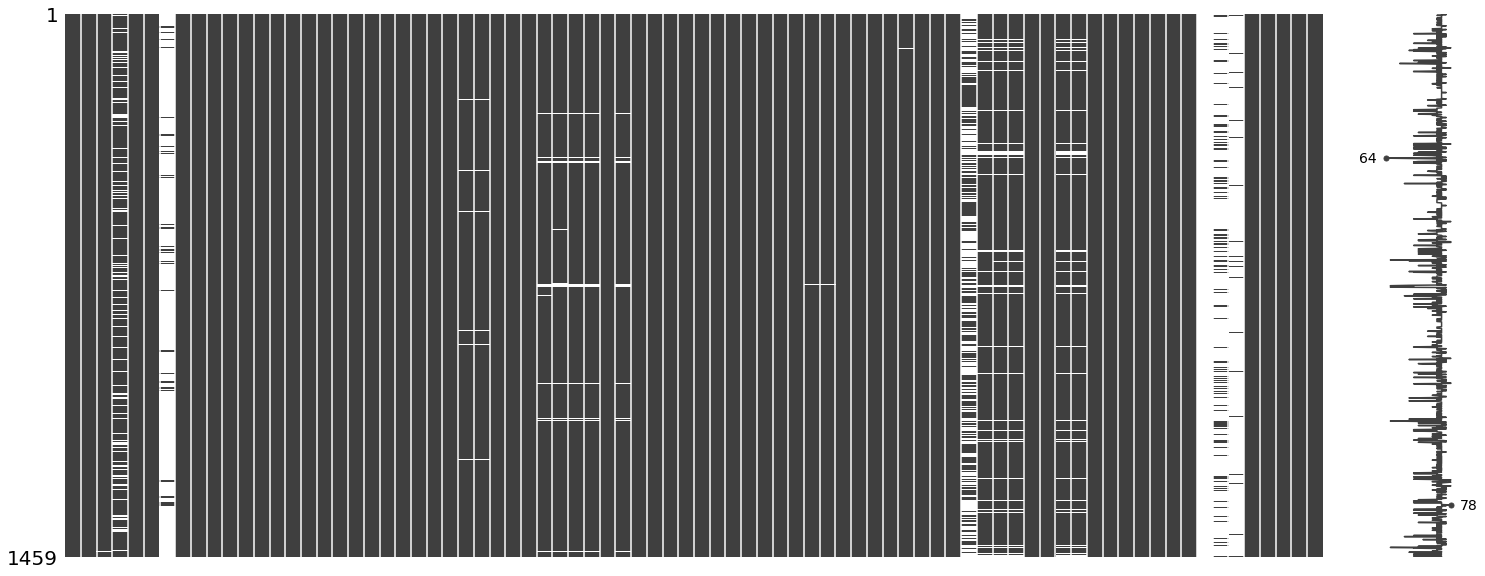

In [541]:
msno.matrix(test)

### Dropping features having missing values greater than 1000

In [542]:
train = train.drop(['Alley','PoolQC','Fence','MiscFeature'] , axis = 1)
test = test.drop(['Alley','PoolQC','Fence','MiscFeature'] , axis = 1)

In [543]:
train.isnull().sum()[train.isnull().sum()>0].index

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [544]:
test.isnull().sum()[test.isnull().sum()>0].index

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

# IMPUTATION

In [545]:
px.box(train,y = ['LotFrontage','MasVnrArea','GarageYrBlt']).update_layout(template='plotly_dark')

In [546]:
num_imp_median = SimpleImputer(strategy='median')

train[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']] = num_imp_median.fit_transform(train[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']])
test[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']] = num_imp_median.transform(test[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']])

num_imp_mean = SimpleImputer(strategy='mean')
train[['GarageYrBlt']] = num_imp_mean.fit_transform(train[['GarageYrBlt']])
test[['GarageYrBlt']] = num_imp_mean.transform(test[['GarageYrBlt']])

In [547]:
cat_col = SimpleImputer(strategy='most_frequent')

train[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType','Electrical']] = cat_col.fit_transform(train[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType','Electrical']])
test[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType','Electrical']] = cat_col.fit_transform(test[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType','Electrical']])

<AxesSubplot:>

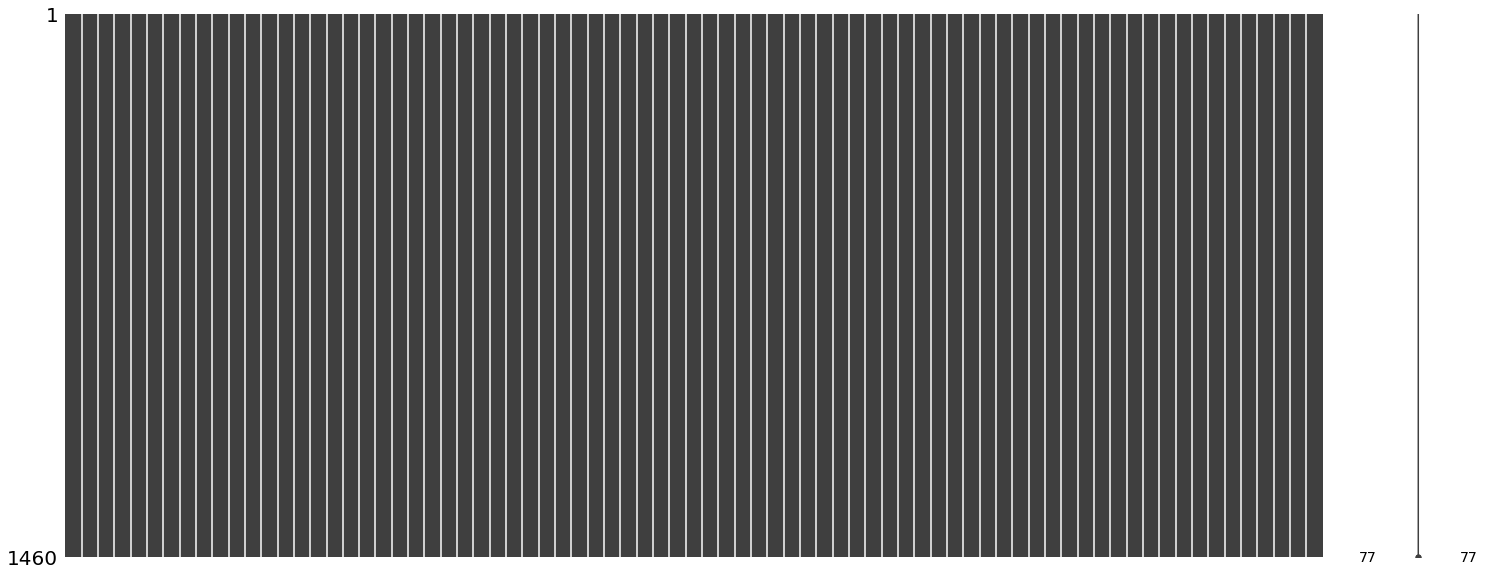

In [548]:
msno.matrix(train)

<AxesSubplot:>

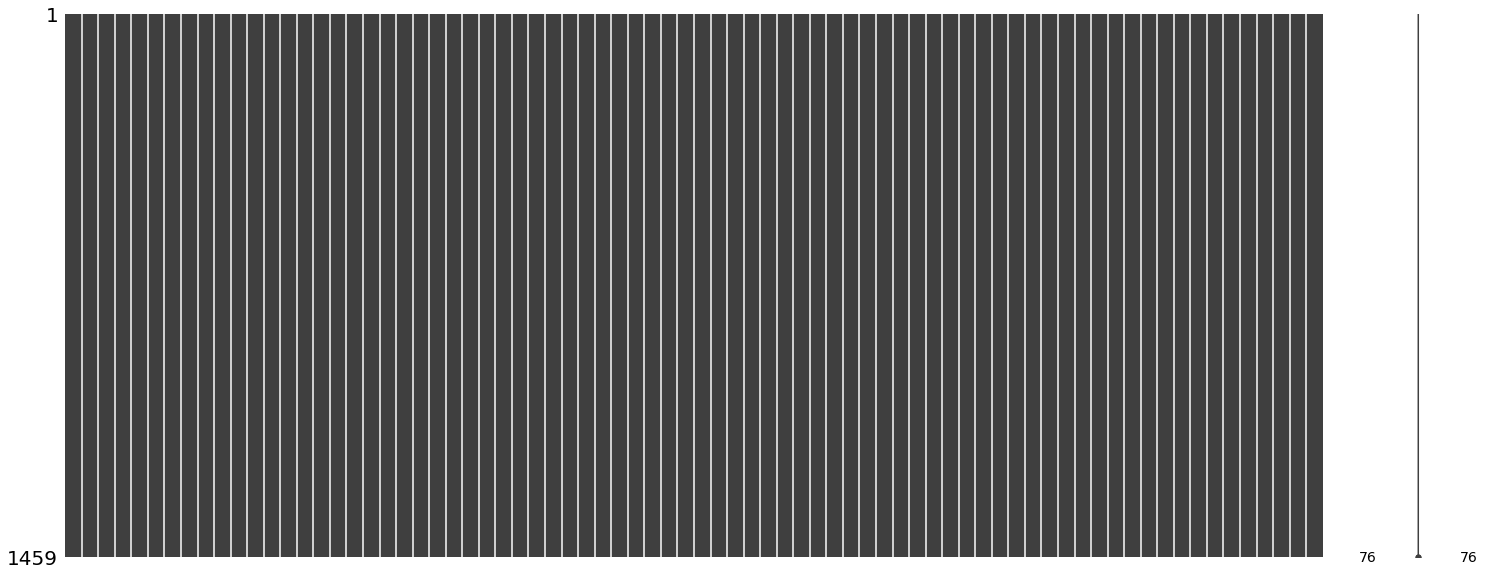

In [549]:
msno.matrix(test)

# CARDINALITY

In [550]:
low_cardinality_cols_train = [cname for cname in train.columns if train[cname].nunique() < 10 and train[cname].dtype == "object"]
low_cardinality_cols_test = [cname for cname in test.columns if train[cname].nunique() < 10 and test[cname].dtype == "object"]
num_col_train = train.select_dtypes(include = 'number').columns
num_col_test = test.select_dtypes(include = 'number').columns
len(low_cardinality_cols_train),len(low_cardinality_cols_test) , len(num_col_train) , len(num_col_test)

(36, 36, 38, 37)

In [551]:
total_train_col = np.concatenate((low_cardinality_cols_train,num_col_train))
total_test_col = np.concatenate((low_cardinality_cols_test,num_col_test))

In [552]:
train = train[total_train_col]
test = test[total_test_col]
train.shape , test.shape 

((1460, 74), (1459, 73))

# Exploratory Data Analysisa

In [553]:
fig = px.imshow(train.corr(),text_auto='.2f',zmin = -1 , zmax = 1 , 
                color_continuous_scale=px.colors.sequential.Aggrnyl).update_layout(template='plotly_dark')
fig.layout.height = 800
fig.layout.width = 1000
fig.show()

### Selecting the most correlated features using pearson's coefficient of correlation

In [554]:
fig = px.imshow(train.corr()[(train.corr()>0.5) | (train.corr()<=-.5)],text_auto='.2f',zmin = -1 , zmax = 1 , 
                color_continuous_scale=px.colors.sequential.Aggrnyl).update_layout(template='plotly_dark')
fig.layout.height = 800
fig.layout.width = 1000
fig.show()
# .update_layout(template="plotly_dark")

In [555]:
((train.corr()['SalePrice']>0.2) | (train.corr()['SalePrice']<-0.2))[((train.corr()['SalePrice']>0.2)|(train.corr()['SalePrice']<-0.2))].index

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

### Checking the distribution of selected correlated features

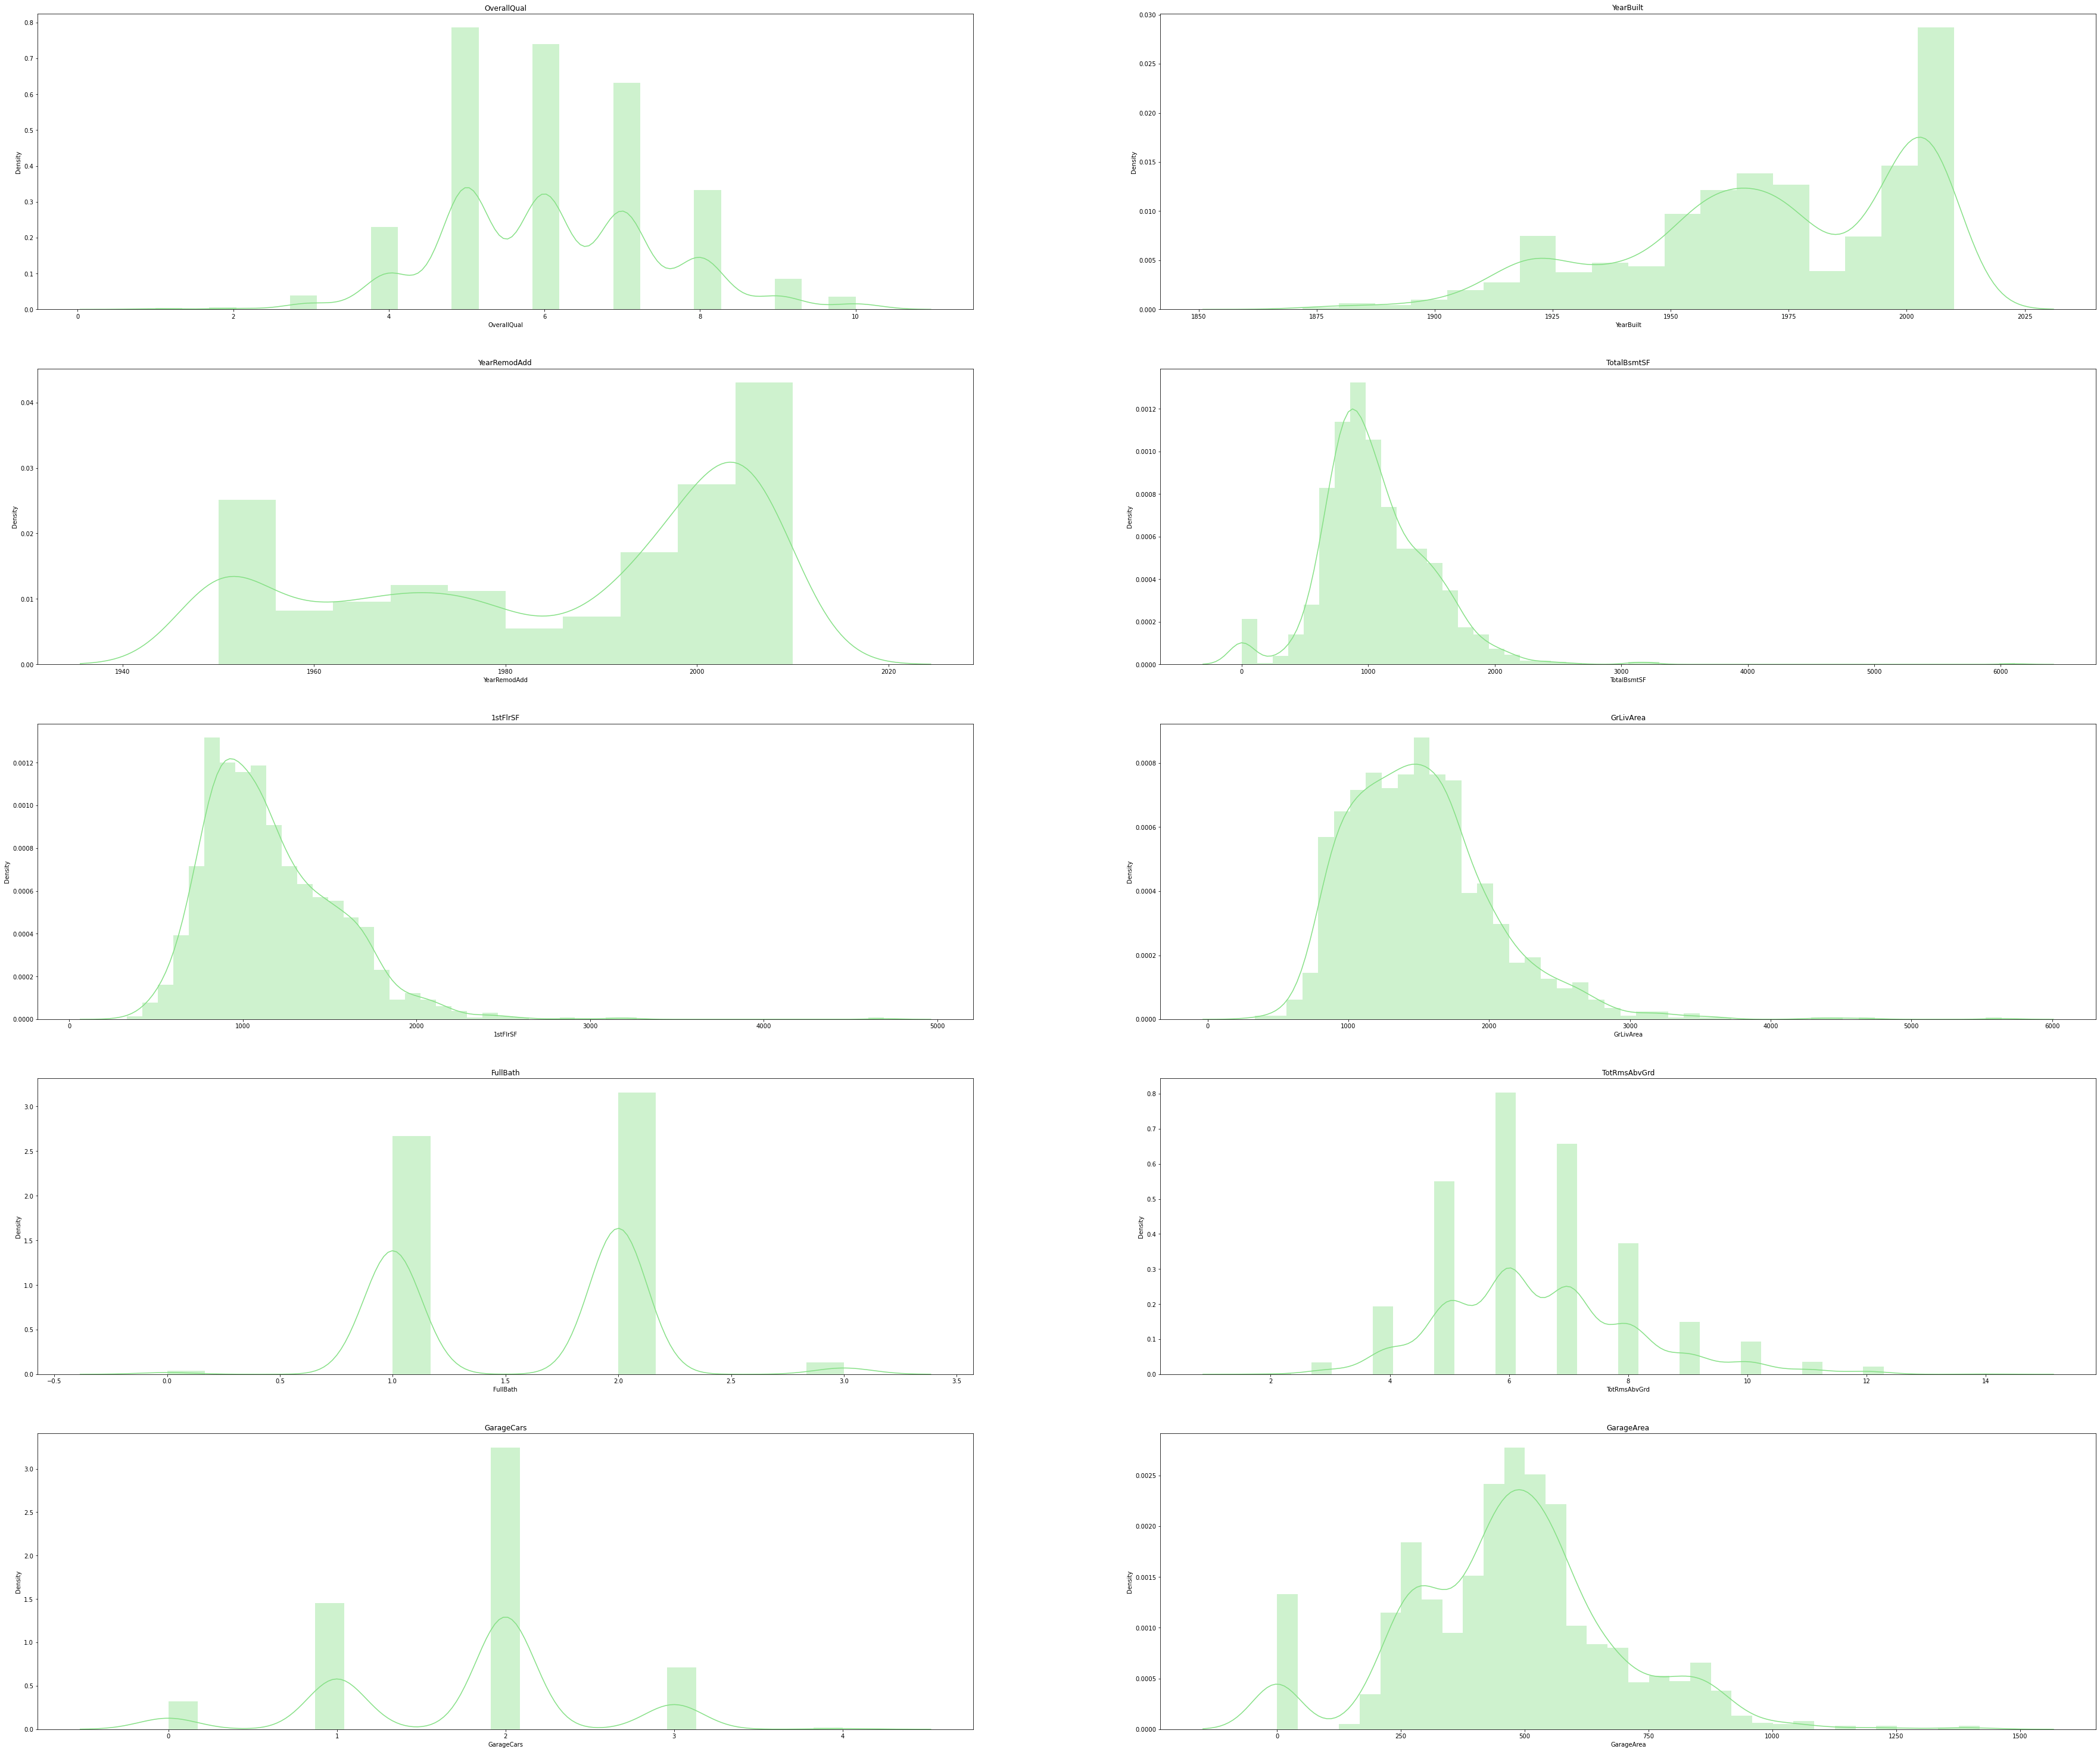

In [496]:
col_n = ['OverallQual',    'YearBuilt', 'YearRemodAdd',  'TotalBsmtSF',
           '1stFlrSF',    'GrLivArea',     'FullBath', 'TotRmsAbvGrd',
         'GarageCars',   'GarageArea']
fig, axes = plt.subplots(nrows = 5 , ncols = 2)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(60,50)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)
# fig.set_size_inches(35,20)
for ax, col_n in zip(axes, col_n):
    sns.distplot(train[col_n], ax = ax , color = '#85e085')
    ax.set_title(col_n)

# NORMALIZATION

In [497]:
# a = np.log(train.GrLivArea+1)
# # 'TotalBsmtSF' (log) , 'GarageArea'(log) , '1stFlrSF'(sqrt) , 'GrLivArea'(log)

In [498]:
train.TotalBsmtSF = np.log(train.TotalBsmtSF+1)
train.GarageArea = np.log(train.GarageArea+1)
train['1stFlrSF'] = np.sqrt(train['1stFlrSF']+1)
train.GrLivArea = np.log(train.GrLivArea+1)

In [499]:
test.TotalBsmtSF = np.log(traintestTotalBsmtSF+1)
test.GarageArea = np.log(test.GarageArea+1)
test['1stFlrSF'] = np.sqrt(test['1stFlrSF']+1)
test.GrLivArea = np.log(test.GrLivArea+1)

NameError: name 'traintestTotalBsmtSF' is not defined

In [ ]:
px.scatter(train,'OverallQual','SalePrice',trendline='ols',color_discrete_sequence=px.colors.diverging.RdBu).update_layout(template='plotly_dark')

In [ ]:
px.scatter(train,train.YearBuilt,'SalePrice',trendline='ols',color_discrete_sequence=px.colors.sequential.Aggrnyl).update_layout(template='plotly_dark')

In [ ]:
px.scatter(train,train.YearRemodAdd,'SalePrice',trendline='ols',color_discrete_sequence=px.colors.sequential.Aggrnyl).update_layout(template='plotly_dark')

In [ ]:
px.scatter(train,train.TotalBsmtSF,'SalePrice',trendline='ols',color_discrete_sequence=px.colors.sequential.algae).update_layout(template='plotly_dark')

In [ ]:
px.scatter(train,train['1stFlrSF'],'SalePrice',trendline='ols',color_discrete_sequence=px.colors.sequential.amp).update_layout(template='plotly_dark')

In [ ]:
px.scatter(train,train.GrLivArea,'SalePrice',trendline='ols',color_discrete_sequence=px.colors.sequential.ice_r).update_layout(template='plotly_dark')

In [ ]:
px.scatter(train,train.FullBath,'SalePrice',trendline='ols',color_discrete_sequence=px.colors.sequential.Greens).update_layout(template='plotly_dark')

In [ ]:
px.scatter(train,train.TotRmsAbvGrd,'SalePrice',trendline='ols',color_discrete_sequence=px.colors.sequential.Darkmint).update_layout(template='plotly_dark')

In [ ]:
px.scatter(train,train.GarageCars,'SalePrice',trendline='ols',color_discrete_sequence=px.colors.sequential.Brwnyl).update_layout(template='plotly_dark')

In [500]:
px.scatter(train,train.GarageArea,'SalePrice',trendline='ols',color_discrete_sequence=px.colors.sequential.Mint).update_layout(template='plotly_dark')

# ENCODING

In [556]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
train_ohe = pd.DataFrame(ohe.fit_transform(train[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition' ]]))
test_ohe = pd.DataFrame(ohe.transform(test[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition' ]]))
train_ohe.index = train.index
test_ohe.index = test.index

In [557]:
train.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
               'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
                   'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual',
                        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                           'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                               'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                                       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
                                                                                'SaleCondition' ],axis = 1,inplace = True)

test.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
               'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
                   'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual',
                        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                           'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                               'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                                       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
                                                                                'SaleCondition' ],axis = 1,inplace = True)

# Selecting features based on high correlation 

In [559]:
# train = train[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea','SalePrice']]
# test = test[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']]

train = train[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
test = test[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF']]

In [560]:
train = pd.concat([train,train_ohe],axis = 1)
test = pd.concat([test,test_ohe],axis = 1)
train = train.iloc[:1459]

In [561]:
train.shape , test.shape

((1459, 206), (1459, 205))

## Dropping one encoded to avoid collinearity problem

In [562]:
train.drop(182,axis = 1,inplace=True)
test.drop(182,axis = 1,inplace = True)

In [563]:
x = train.drop('SalePrice',axis = 1)
y = train.SalePrice

In [564]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,train_size=0.9,random_state=0)

In [565]:
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape

((1313, 204), (146, 204), (1313,), (146,))

In [566]:
def model_acc(estimator,xtrain,ytrain,xtest,ytest):
    estimator = estimator
    estimator.fit(xtrain,ytrain)
    ypred = estimator.predict(xtest)
    print('R-Score: ',np.round(estimator.score(xtest,ytest),5))
    print('R2_Score: ', np.round(r2_score(ytest,ypred),5))        
    print('MEAN ABSOLUTE ERROR: ', np.round(mean_absolute_error(ytest,ypred)))
    print('MEAN SQUARED ERROR: ', np.round(mean_squared_error(ytest,ypred)))
    print('ROOT-MEAN SQUARED ERROR: ', np.round(np.sqrt(mean_squared_error(ytest,ypred))))
    return np.round(r2_score(ytest,ypred),5) , np.round(mean_absolute_error(ytest,ypred)) , np.round(mean_squared_error(ytest,ypred)) , np.round(np.sqrt(mean_squared_error(ytest,ypred)))

In [567]:
models = pd.DataFrame(columns = ['MODEL','R2 Score','MAE','MSE','RMSE'])

In [568]:
fst,scnd,thrd,frth = model_acc(LinearRegression(),xtrain,ytrain,xtest,ytest)

models = models.append({ 'MODEL' : 'Linear' ,
       'R2 Score' : fst ,
       'MAE' : scnd ,
       'MSE' : thrd ,
       'RMSE' : frth 
     },ignore_index=True)

R-Score:  0.86761
R2_Score:  0.86761
MEAN ABSOLUTE ERROR:  19646.0
MEAN SQUARED ERROR:  769386338.0
ROOT-MEAN SQUARED ERROR:  27738.0


In [569]:
fst,scnd,thrd,frth = model_acc(DecisionTreeRegressor(max_depth=9),xtrain,ytrain,xtest,ytest)

models = models.append({ 'MODEL' : 'Decision Tree' ,
       'R2 Score' : fst ,
       'MAE' : scnd ,
       'MSE' : thrd ,
       'RMSE' : frth 
     },ignore_index=True)

R-Score:  0.72861
R2_Score:  0.72861
MEAN ABSOLUTE ERROR:  26050.0
MEAN SQUARED ERROR:  1577198546.0
ROOT-MEAN SQUARED ERROR:  39714.0


In [570]:
fst,scnd,thrd,frth = model_acc(RandomForestRegressor(n_estimators=150),xtrain,ytrain,xtest,ytest)

models = models.append({ 'MODEL' : 'Random Forest' ,
       'R2 Score' : fst ,
       'MAE' : scnd ,
       'MSE' : thrd ,
       'RMSE' : frth 
     },ignore_index=True)

R-Score:  0.86416
R2_Score:  0.86416
MEAN ABSOLUTE ERROR:  17690.0
MEAN SQUARED ERROR:  789478756.0
ROOT-MEAN SQUARED ERROR:  28098.0


In [571]:
fst,scnd,thrd,frth = model_acc(SVR(kernel='linear'),xtrain,ytrain,xtest,ytest)

models = models.append({ 'MODEL' : 'Support Vector Machine' ,
       'R2 Score' : fst ,
       'MAE' : scnd ,
       'MSE' : thrd ,
       'RMSE' : frth 
     },ignore_index=True)

R-Score:  0.79598
R2_Score:  0.79598
MEAN ABSOLUTE ERROR:  22741.0
MEAN SQUARED ERROR:  1185683927.0
ROOT-MEAN SQUARED ERROR:  34434.0


In [590]:
models.sort_values(by ='R2 Score',ascending=True)

,MODEL,R2 Score,MAE,MSE,RMSE
1,Decision Tree,0.72861,26050.0,1.577199e+09,39714.0
3,Support Vector Machine,0.79598,22741.0,1.185684e+09,34434.0
2,Random Forest,0.86416,17690.0,7.894788e+08,28098.0
0,Linear,0.86761,19646.0,7.693863e+08,27738.0


In [586]:
# rfr = RandomForestRegressor(n_estimators=150)
# rfr.fit(x,y)
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [587]:
# ypred = rfr.predict(test)
# ypred = pd.Series(ypred,name='SalePrice')
ypred = lr.predict(test)
ypred = pd.Series(ypred,name='SalePrice')

In [588]:
submission = pd.concat([ID,ypred],axis = 1)

In [589]:
submission.to_csv('submission.csv', index = False)

In [113]:
model_acc(LinearRegression(),xtrain,ytrain,xtest,ytest)

R-Score:  0.81862
MEAN ABSOLUTE ERROR:  22770.0
MEAN SQUARED ERROR:  1085705707.0
R2_Score:  0.81862


In [114]:
model_acc(DecisionTreeRegressor(max_depth=9),xtrain,ytrain,xtest,ytest)

R-Score:  0.7004
MEAN ABSOLUTE ERROR:  25688.0
MEAN SQUARED ERROR:  1793346983.0
R2_Score:  0.7004


In [115]:
model_acc(RandomForestRegressor(n_estimators=150),xtrain,ytrain,xtest,ytest)

R-Score:  0.84675
MEAN ABSOLUTE ERROR:  19160.0
MEAN SQUARED ERROR:  917329329.0
R2_Score:  0.84675


In [116]:
model_acc(SVR(kernel='linear'),xtrain,ytrain,xtest,ytest)

R-Score:  0.77571
MEAN ABSOLUTE ERROR:  23879.0
MEAN SQUARED ERROR:  1342549397.0
R2_Score:  0.77571


In [ ]:
x = train.drop('SalePrice',axis = 1)
# x = train[['OverallQual','YearBuilt','YearRemodAdd','FullBath','TotRmsAbvGrd','1stFlrSF','TotalBsmtSF','GrLivArea',
# 'GarageArea','GarageCars','LotFrontage' , 'LotArea' , 'MasVnrArea' , 'BsmtFinSF1' , 'BsmtUnfSF' , 'GarageYrBlt',
#           '2ndFlrSF' , 'BsmtFullBath' , 'HalfBath','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF']]
# x = train[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
#        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
#        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
#        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
#        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
#        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
#        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
#        'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]
# x['OverallQual','YearBuilt','YearRemodAdd','FullBath','TotRmsAbvGrd','1stFlrSF','TotalBsmtSF','GrLivArea',
# 'GarageArea','GarageCars','LotFrontage' , 'LotArea' , 'MasVnrArea' , 'BsmtFinSF1' , 'BsmtUnfSF' , 'GarageYrBlt',
#           '2ndFlrSF' , 'BsmtFullBath' , 'HalfBath','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF'] = ss.fit_transform(train[['OverallQual','YearBuilt','YearRemodAdd','FullBath','TotRmsAbvGrd','1stFlrSF','TotalBsmtSF','GrLivArea',
# 'GarageArea','GarageCars','LotFrontage' , 'LotArea' , 'MasVnrArea' , 'BsmtFinSF1' , 'BsmtUnfSF' , 'GarageYrBlt',
#           '2ndFlrSF' , 'BsmtFullBath' , 'HalfBath','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF']])
y = train.SalePrice
x.shape , y.shape

x = train[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

In [584]:
model_acc(LinearRegression(),xtrain,ytrain,xtest,ytest)

R-Score:  1.0
MEAN ABSOLUTE ERROR:  0.0
MEAN SQUARED ERROR:  0.0
R2_Score:  1.0


In [585]:
model_acc(DecisionTreeRegressor(),xtrain,ytrain,xtest,ytest)

R-Score:  0.99362
MEAN ABSOLUTE ERROR:  928.0
MEAN SQUARED ERROR:  38214690.0
R2_Score:  0.99362


In [586]:
model_acc(RandomForestRegressor(),xtrain,ytrain,xtest,ytest)

R-Score:  0.99859
MEAN ABSOLUTE ERROR:  540.0
MEAN SQUARED ERROR:  8441305.0
R2_Score:  0.99859


In [587]:
model_acc(SVR(kernel='linear'),xtrain,ytrain,xtest,ytest)

R-Score:  1.0
MEAN ABSOLUTE ERROR:  0.0
MEAN SQUARED ERROR:  0.0
R2_Score:  1.0


[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

In [520]:
model_acc(LinearRegression(),xtrain,ytrain,xtest,ytest)

R-Score:  1.0
MEAN ABSOLUTE ERROR:  0.0
MEAN SQUARED ERROR:  0.0
R2_Score:  1.0


In [444]:
model_acc(DecisionTreeRegressor(),xtrain,ytrain,xtest,ytest)

R-Score:  0.99364
MEAN ABSOLUTE ERROR:  891.0
MEAN SQUARED ERROR:  38053014.0
R2_Score:  0.99364


In [445]:
model_acc(RandomForestRegressor(),xtrain,ytrain,xtest,ytest)

R-Score:  0.99735
MEAN ABSOLUTE ERROR:  591.0
MEAN SQUARED ERROR:  15847639.0
R2_Score:  0.99735


In [446]:
model_acc(SVR(kernel='linear'),xtrain,ytrain,xtest,ytest)

R-Score:  1.0
MEAN ABSOLUTE ERROR:  0.0
MEAN SQUARED ERROR:  0.0
R2_Score:  1.0


### 'OverallQual','YearBuilt','YearRemodAdd','FullBath','TotRmsAbvGrd','1stFlrSF','TotalBsmtSF','GrLivArea', 'GarageArea','GarageCars','LotFrontage' , 'LotArea' , 'MasVnrArea' , 'BsmtFinSF1' , 'BsmtUnfSF' , 'GarageYrBlt', '2ndFlrSF' , 'BsmtFullBath' , 'HalfBath','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF'

In [390]:
model_acc(LinearRegression(),xtrain,ytrain,xtest,ytest)

R-Score:  0.85364
MEAN ABSOLUTE ERROR:  21481.0
MEAN SQUARED ERROR:  826204763.0
R2_Score:  0.85364


In [391]:
model_acc(DecisionTreeRegressor(),xtrain,ytrain,xtest,ytest)

R-Score:  0.77129
MEAN ABSOLUTE ERROR:  25215.0
MEAN SQUARED ERROR:  1291074910.0
R2_Score:  0.77129


In [392]:
model_acc(RandomForestRegressor(),xtrain,ytrain,xtest,ytest)

R-Score:  0.89658
MEAN ABSOLUTE ERROR:  17242.0
MEAN SQUARED ERROR:  583788944.0
R2_Score:  0.89658


In [393]:
model_acc(SVR(kernel='linear'),xtrain,ytrain,xtest,ytest)

R-Score:  0.82648
MEAN ABSOLUTE ERROR:  21754.0
MEAN SQUARED ERROR:  979489396.0
R2_Score:  0.82648


In [159]:
model_acc(LinearRegression(),xtrain,ytrain,xtest,ytest)

R-Score:  0.8154
MEAN ABSOLUTE ERROR:  19459.0
MEAN SQUARED ERROR:  1275936315.0
R2_Score:  0.8154


In [160]:
model_acc(DecisionTreeRegressor(),xtrain,ytrain,xtest,ytest)

R-Score:  0.71031
MEAN ABSOLUTE ERROR:  27947.0
MEAN SQUARED ERROR:  2002351888.0
R2_Score:  0.71031


In [161]:
model_acc(RandomForestRegressor(),xtrain,ytrain,xtest,ytest)

R-Score:  0.87526
MEAN ABSOLUTE ERROR:  18409.0
MEAN SQUARED ERROR:  862216115.0
R2_Score:  0.87526


In [162]:
model_acc(SVR(kernel='linear'),xtrain,ytrain,xtest,ytest)

R-Score:  0.81072
MEAN ABSOLUTE ERROR:  23205.0
MEAN SQUARED ERROR:  1308338097.0
R2_Score:  0.81072
